# Ex.1 - Experimenting with Multi-Class Sequence Classification using RNNs and LSTMs

In [ ]:
'''
Experimenting with Multi-Class Sequence Classification using RNNs and LSTMs
Steps :
1. Load and visualize the training and testing data in 'data/P2_E1.csv' as shown in the following code cell.
2. Following section 2 in the examples, train a RNN or LSTM to solve the multi-class sequence classification problem:
  -   Adapt the classification loss and the SequenceClassifier module
  -   Adapt the test_sequence_classifier function to compute the multi-class accuracy and be able to visualize the confusion matrix
3. Experiment with different models by changing different hyper-parameters (e.g, num_layers, hidden_size, optimiziers, activation_functions for RNNs, etc..) and evaluate  the results for each of them on the testing set.
4. Visualize analyse and discuss the results in the report.
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Seqs: (210, 40)
Train Labels: (210,)
Test Seqs: (90, 40)
Test Labels: (90,)


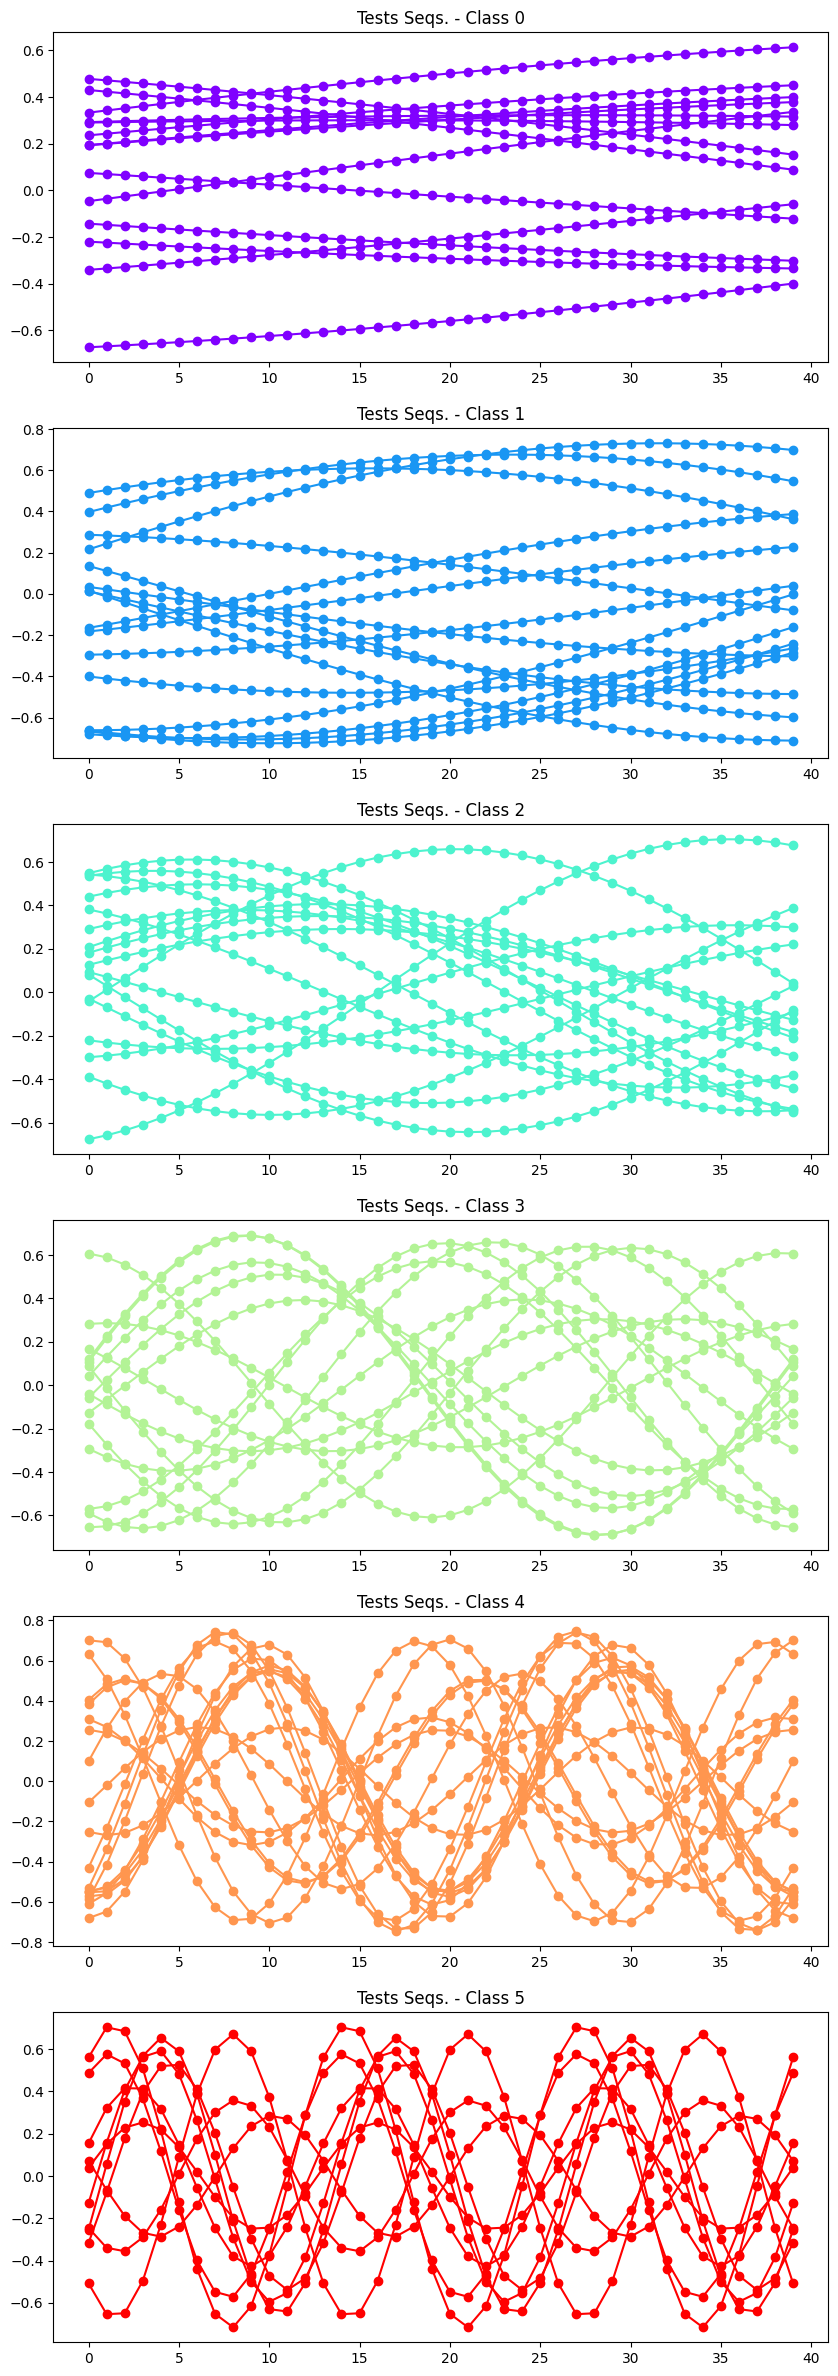

In [ ]:
from google.colab import drive
import numpy as np
import os
import matplotlib.pyplot as plt

drive.mount('/content/drive')
myDrive = '/content/drive/My Drive/DeepLearning_2023/P2/Data/'


myDrive = '/content/drive/My Drive/DeepLearning_2023/P2/Data/'
file_path = os.path.join(myDrive,'P2_E1.npz') 
data = np.load(file_path )
X_train, X_test = data['X_train'],data['X_test'] 
Y_train, Y_test = data['Y_train'],data['Y_test']

print(f'Train Seqs: {X_train.shape}')
print(f'Train Labels: {Y_train.shape}')
print(f'Test Seqs: {X_test.shape}')
print(f'Test Labels: {Y_test.shape}')

classes = np.unique(Y_train)
n_classes = len(classes)
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))

fig, axs = plt.subplots(n_classes,1, figsize=(10, 5*n_classes))
for class_idx in range(0,n_classes):
  axs[class_idx].plot(X_test[Y_test==class_idx,:].T,'-o',
                      c=colors[class_idx])
  axs[class_idx].set_title(f'Tests Seqs. - Class {class_idx}')
fig.show()


#Sol 1. 

#Ex 2. Cryptoanalysis with corrupted messages using RNNs/LSTMs

In [ ]:
'''
Similar to the exercise solved on P2-examples, you have to solve time-series modelling based on Cryptanalysis. 

For this exercise, you have training.pkl and testing_corrupted.pkl files. 
These files contain a new encrypted dataset of 10000 sentences, 8000 for training and 2000 for the test. 
Similar to the exercise solved in class, all the samples are encrypted using the Vigenère cipher with 
7-length keyword. However, during the transmission of the test set, the encrypted data has been corrupted 
with a new char ("-"), while the training set has been transmitted correctly. 

Each 32-length sentence contains 4 corrupted chars randomly distributed on the test set, representing 12,5 % of total data.

Example:

Received Ciphertext:   'WCPS-VH-JHIKCUSETJV-AW-LPVUAHFHH'
Correct Ciphertext (Not provided):   'WCPSEVHAJHIKCUSETJVKAWGLPVUAHFHH'
Ground truth:   'HEWENTALLOUTANDGAVEITHISBESTSHOT'

Steps : 
1. Discover the keyword used to encrypt the plaintext data. (hint: use Vigenère table and some samples)
2. Analyze the data distribution and define the new alphabet.
3. Design/Implement an strategy to train the model so that it can be robust to missing characters in the testing samples ( to be discussed in class )
4. Train a sequential model to decode the corrupted test data. 
5. Evaluate the decoding accuracy for the test set in terms of characters that were not corrupted or corrupted independently.
6. Try to improve the performance by applying some improvements over the model: stacked LSTMs, 
hidden_sizes, embedding_size, optimizer, data augmentation during training, etc...
7. Visualize and discuss on the final results.
'''

'\nSimilar to the exercise solved on P2-examples, you have to solve time-series modelling based on Cryptanalysis. \n\nFor this exercise, you have training.pkl and testing_corrupted.pkl files. \nThese files contain a new encrypted dataset of 10000 sentences, 8000 for training and 2000 for the test. \nSimilar to the exercise solved in class, all the samples are encrypted using the Vigenère cipher with \n7-length keyword. However, during the transmission of the test set, the encrypted data has been corrupted \nwith a new char ("-"), while the training set has been transmitted correctly. \n\nEach 32-length sentence contains 4 corrupted chars randomly distributed on the test set, representing 12,5 % of total data.\n\nExample:\n\nReceived Ciphertext:   \'WCPS-VH-JHIKCUSETJV-AW-LPVUAHFHH\'\nCorrect Ciphertext (Not provided):   \'WCPSEVHAJHIKCUSETJVKAWGLPVUAHFHH\'\nGround truth:   \'HEWENTALLOUTANDGAVEITHISBESTSHOT\'\n\nSteps : \n1. Discover the keyword used to encrypt the plaintext data. (hin

# Sol 2.

In [ ]:
import pickle
from google.colab import drive
import numpy as np
import os

drive.mount('/content/drive')
myDrive = '/content/drive/My Drive/DeepLearning_2023/P2/Data/'


with open(myDrive+'training.pkl', 'rb') as pkl_file:
  train = pickle.load(pkl_file)

with open(myDrive+'testing_corrupted.pkl', 'rb') as pkl_file:
  test = pickle.load(pkl_file)
vocabulary = [char for char in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ-'] # Predefined vocabulary

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Corrupted Testing Sequence Visualization
def decode_message(message, vocabulary):
  decoded = ''
  for letter_code in message:
    decoded += vocabulary[letter_code]
  return decoded
  
idx_sample = 2
print(f'Train Message encrypted (not corrupted): {decode_message(train[idx_sample][0],vocabulary)}')
print(f'Train Message decrypted: {decode_message(train[idx_sample][1],vocabulary)}')

print(f'Test Message encrypted and corrupted: {decode_message(test[idx_sample][0],vocabulary)}')
print(f'Test Message decrypted (must be used only for evaluation purposes): {decode_message(test[idx_sample][1],vocabulary)}')


Train Message encrypted ( not corrupted): XRACLIOIWHICKRTBMCCGHGLGSNVOXLZG
Train Message decrypted: ITHOUGHTYOULIKEDTOLEARNNEWTHINGS
Test Message encrypted and corrupted: -CXLGNH-LX-KQO-PAWJEPGANAJVHCAXG
Test Message decrypted (must be used only for evaluation purposes): HEEXPLAINEDTOHERHISCIRCUMSTANCES
